In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.tools as tls
import plotly.offline as py
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from plotly.tools import make_subplots
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
#!pip install plotly

### 1. Data Exploration and Visualization:

In [18]:
# Load the dataset
file_path = 'credit_risk_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [19]:
# Display the first few rows of the dataset
#display(df.head())

# Summary statistics
display(df.describe())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


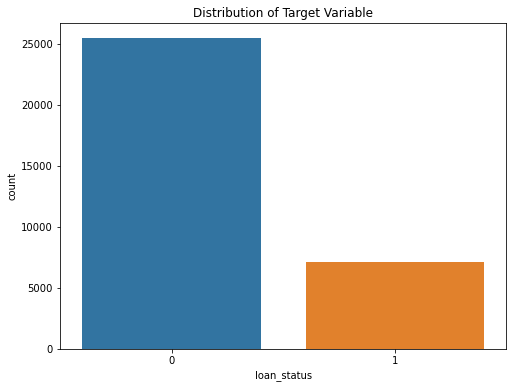

In [20]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Target Variable')
plt.show()

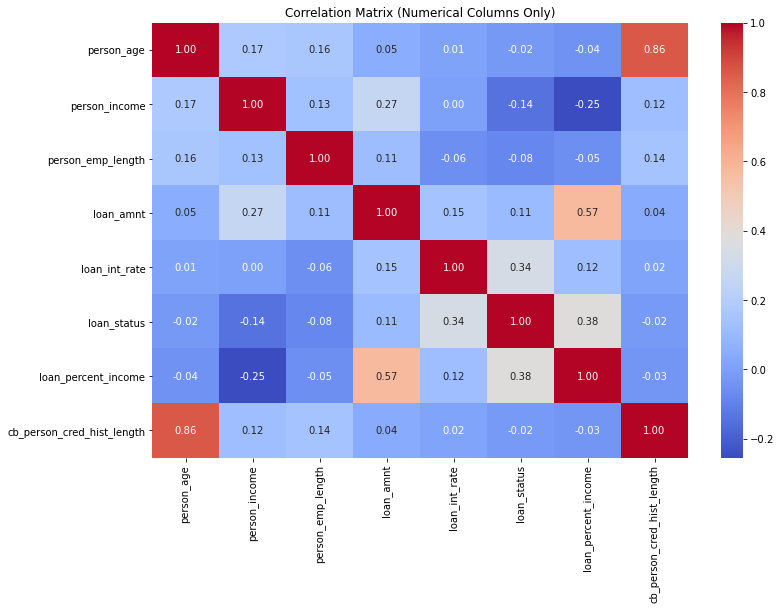

In [21]:
# Visualize the correlation matrix for numerical columns only
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numerical Columns Only)')
plt.show()

In [22]:
df_good = df.loc[df["loan_status"] == 0]['person_age'].values.tolist()
df_bad = df.loc[df["loan_status"] == 1]['person_age'].values.tolist()
df_age = df['person_age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Loan status = 0"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Loan status = 1"
)

#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')


C:\Users\Rabia.Hashim\anaconda3\lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### 2. Data Preprocessing  & Cleansing

In [23]:
# Display the number of missing values in each column
print("Missing Values:")
print(df.isnull().sum())

# Handling Missing Values
# For simplicity, let's fill missing numerical values with the mean and categorical values with the most frequent value.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute missing numerical values
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Impute missing categorical values
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Encoding Categorical Variables
# For simplicity, let's use Label Encoding. You may consider one-hot encoding for more complex cases.
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the cleaned dataset
print("\nCleaned Dataset:")
display(df.head(2))

Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Cleaned Dataset:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,3,123.0,4,3,35000.0,16.02,1.0,0.59,1,3.0
1,21.0,9600.0,2,5.0,1,1,1000.0,11.14,0.0,0.10,0,2.0


### 3. Feature Engineering

In [24]:
# Feature Engineering
# Example 1: Creating a new feature based on existing features
df['monthly_debt'] = df['loan_amnt'] * df['loan_percent_income'] 

# Example 2: Creating a binary feature based on a condition
df['long_emp_length'] = df['person_emp_length'] > 5  # Adjust the condition as needed

# Example 3: Combining multiple features
df['income_per_age'] = df['person_income'] / df['person_age']

# Display the dataset with new features
print("\nDataset with New Features:")
display(df.head())


Dataset with New Features:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,monthly_debt,long_emp_length,income_per_age
0,22.0,59000.0,3,123.0,4,3,35000.0,16.02,1.0,0.59,1,3.0,20650.0,True,2681.818182
1,21.0,9600.0,2,5.0,1,1,1000.0,11.14,0.0,0.10,0,2.0,100.0,False,457.142857
2,25.0,9600.0,0,1.0,3,2,5500.0,12.87,1.0,0.57,0,3.0,3135.0,False,384.000000
3,23.0,65500.0,3,4.0,3,2,35000.0,15.23,1.0,0.53,0,2.0,18550.0,False,2847.826087
4,24.0,54400.0,3,8.0,3,2,35000.0,14.27,1.0,0.55,1,4.0,19250.0,True,2266.666667


### 4. Model Selection and Training

#### 1. Logistic Regression

In [25]:
# Select features and target variable
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

# Make predictions using Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Display the evaluation metrics for Logistic Regression
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_lr:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_lr)


Logistic Regression Model Evaluation:
Accuracy: 0.83

Confusion Matrix:
[[4847  225]
 [ 892  553]]


C:\Users\Rabia.Hashim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### 2) Random Forest

In [26]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
display(conf_matrix)


Model Evaluation:
Accuracy: 0.93

Confusion Matrix:


array([[5024,   48],
       [ 421, 1024]], dtype=int64)

### 5. Model Evaluation and Validation:

In [27]:
# Implement cross-validation for Random Forest
rf_cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:")
print(rf_cv_scores)
print(f"Mean Accuracy: {rf_cv_scores.mean():.2f}")

# Implement cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Scores:")
print(lr_cv_scores)
print(f"Mean Accuracy: {lr_cv_scores.mean():.2f}")

Random Forest Cross-Validation Scores:
[0.91315022 0.90162676 0.92587477 0.90991406 0.92203806]
Mean Accuracy: 0.91


C:\Users\Rabia.Hashim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Logistic Regression Cross-Validation Scores:
[0.8203161  0.78222836 0.83225905 0.82228361 0.81568447]
Mean Accuracy: 0.81


In [28]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_RF': y_pred,
    'Predicted_LR': y_pred_lr
})

# Display the results DataFrame
print("Actual vs Predicted Results:")
display(results_df.head(10))

Actual vs Predicted Results:


,Actual,Predicted_RF,Predicted_LR
14668,0.0,0.0,0.0
24614,0.0,0.0,0.0
11096,0.0,0.0,0.0
10424,1.0,1.0,0.0
26007,1.0,1.0,1.0
9614,0.0,0.0,0.0
6204,0.0,0.0,0.0
19286,0.0,0.0,0.0
10297,0.0,0.0,0.0
20560,0.0,0.0,0.0


In [29]:
# Add features to the DataFrame
results_df = pd.concat([results_df, X_test], axis=1)

# Display the results DataFrame
print("Actual vs Predicted Results with Features:")
display(results_df.head())

Actual vs Predicted Results with Features:


,Actual,Predicted_RF,Predicted_LR,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,monthly_debt,long_emp_length,income_per_age
14668,0.0,0.0,0.0,24.0,28000.0,2,6.0,2,1,10000.0,10.370000,0.36,0,2.0,3600.0,True,1166.666667
24614,0.0,0.0,0.0,27.0,64000.0,3,0.0,4,2,10000.0,15.270000,0.16,1,10.0,1600.0,False,2370.370370
11096,0.0,0.0,0.0,26.0,72000.0,0,10.0,1,3,16000.0,11.011695,0.22,0,3.0,3520.0,True,2769.230769
10424,1.0,1.0,0.0,23.0,27996.0,3,7.0,0,0,10000.0,11.011695,0.36,0,2.0,3600.0,True,1217.217391
26007,1.0,1.0,1.0,30.0,44500.0,3,2.0,3,4,13000.0,16.320000,0.29,0,6.0,3770.0,False,1483.333333
